In [1]:
### Reference: https://medium.com/accredian/gradient-descent-from-the-ground-up-building-your-own-algorithm-from-scratch-a7f608559147

import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


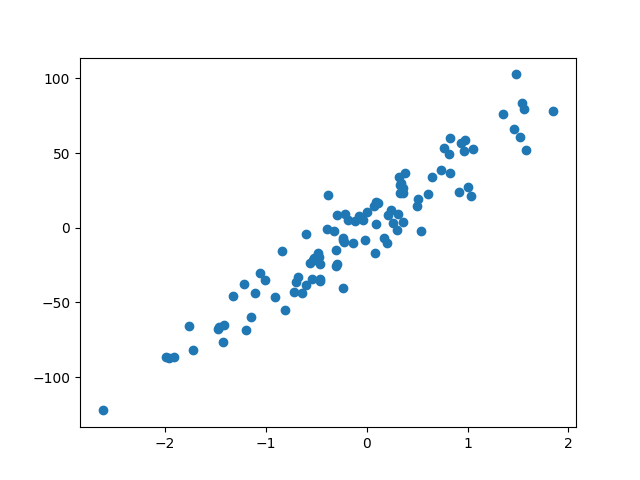

In [2]:
x,y = make_regression(n_samples=100, 
                      n_features=1,
                      n_informative=1,
                      n_targets=1,
                      noise=15,
                      random_state=42)

plt.scatter(x,y)

In [3]:
model = LinearRegression()

model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
print(model.intercept_)
print(model.coef_)

1.7476729807904583
[45.78520483]


In [5]:
class GradientDescent:
    def __init__(self, epochs, alpha) -> None:
        self.epochs = epochs
        self.alpha = alpha
        self.m = 1 # slope
        self.b = 0 # intercept

    def fit(self, x, y):
        for i in range(self.epochs):
            loss_b = -2 * np.sum(y - self.m*x.ravel() - self.b)
            loss_m = -2 * np.sum((y - self.m*x.ravel() - self.b)*x.ravel())
            self.b = self.b - (self.alpha*loss_b)
            self.m = self.m - (self.alpha*loss_m)
            print("{} --- {}, {}".format(i+1, self.m, self.b))

In [6]:
gd = GradientDescent(epochs=100, alpha=0.001)
gd.fit(x,y)
### custom implementation of grad descent does converge to the val obtained by the lin reg model


1 --- 8.373918415248287, -0.5806229143368344
2 --- 14.515679873900055, -0.89197009641196
3 --- 19.634751286403414, -1.013487734442809
4 --- 23.904290862538968, -1.0043822971714607
5 --- 27.467576159612793, -0.9084225841827954
6 --- 30.4432688024636, -0.7576478600753243
7 --- 32.92973108090645, -0.5752250172302906
8 --- 35.00856897624922, -0.37764465330464875
9 --- 36.74754334318184, -0.1764043470324923
10 --- 38.20296444337964, 0.020705184353942918
11 --- 39.42166356396878, 0.2086208919825756
12 --- 40.44261807235895, 0.38426498997036695
13 --- 41.29829216821552, 0.5459847823834237
14 --- 42.01574415851873, 0.6931323712896782
15 --- 42.61754179232681, 0.8257514205327717
16 --- 43.12251963739875, 0.9443455776166416
17 --- 43.546406330611525, 1.0497089413981167
18 --- 43.902344521665796, 1.1428034637952658
19 --- 44.20132223997046, 1.224671670022693
20 --- 44.452531074279534, 1.296375793969509
21 --- 44.66366382335968, 1.3589565256432874
22 --- 44.841162040216716, 1.4134061911222728
23 -

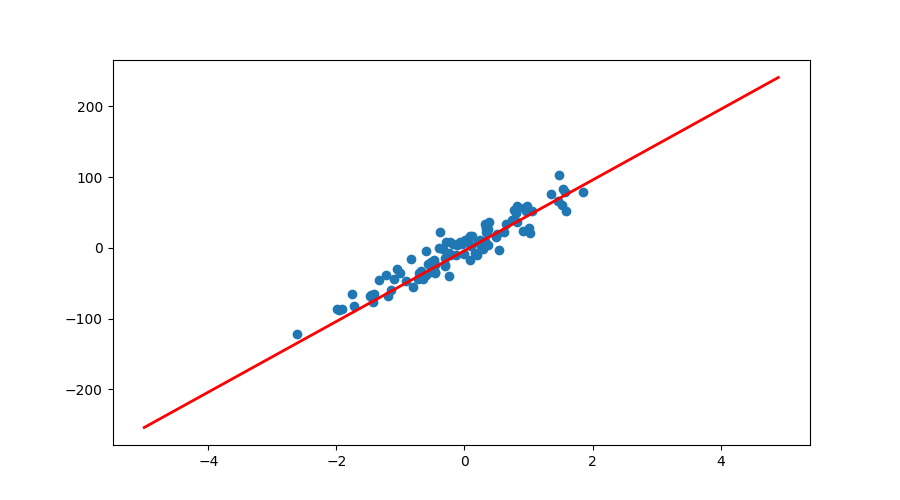

In [ ]:
### creating a dynamic plot to see grad descent find the best fit line

from matplotlib.animation import FuncAnimation
from matplotlib import animation

# init b and m to random vals
b     = -800   # intercept
m     = 500     # slope
alpha = 0.001  # learning rate
lst_b, lst_m, lst_cost = [], [], []
epochs = 50

for i in range(epochs):
    pd_b = 0
    pd_m = 0
    cost = 0
    for i in range(x.shape[0]):
        pd_b = pd_b - 2*(y[i] - (m*x[i]) - b)
        pd_m = pd_m - 2*(y[i] - (m*x[i]) - b)*x[i]
        cost = cost + (y[i] - m*x[i] - b)**2
    b = b - (alpha*pd_b)
    m = m - (alpha*pd_m)
    lst_b.append(b)
    lst_m.append(m)
    lst_cost.append(cost)

fig,ax = plt.subplots(figsize=(9,5))
x_i = np.arange(-5, 5, 0.1)
y_i = x_i*(-30) - 200
ax.scatter(x,y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*lst_m[i] + lst_b[i])
    ax.set_xlabel(label)

anim = FuncAnimation(fig, update, frames=epochs, interval=500, repeat=False)

In [8]:
## exporting the animation

f = r"animation.gif"
write = animation.PillowWriter(fps=2)
anim.save(f, writer=write)